In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values


In [41]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, p= 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data  
y = iris.target  


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 93.75


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[54  4]
 [ 1 21]]


C:\Users\jawad\AppData\Local\Temp\ipykernel_2076\720176176.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


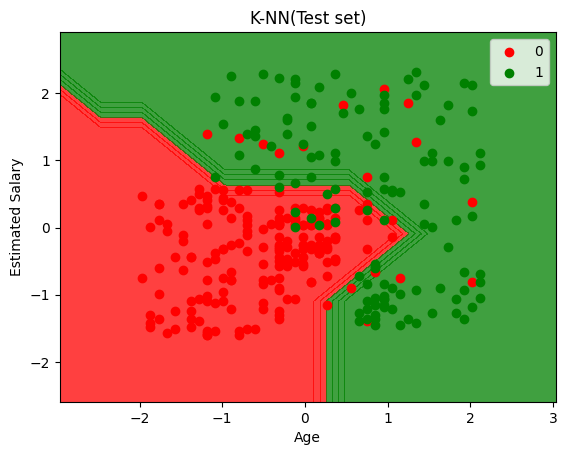

In [47]:
from matplotlib.colors import ListedColormap

X_set, Y_set = X_train, Y_train
step = 0.5  # Adjust the step size as needed

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=step))

# Plot the decision boundary
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


The K-Nearest Neighbors (K-NN) model achieved an accuracy of 93.75% on the test set, correctly predicting 54 non-purchases, 21 purchases, 4 incorrect non-purchases, and 1 incorrect purchase. Overall, the K-NN model performed reasonably well.